# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter

## Getting the Data

In [3]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [4]:
Currency_Pair = 'GBPUSD'

## TF D1

In [5]:
TF = 'D1'

In [6]:
data_1 = XAUUSD[TF]

In [7]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

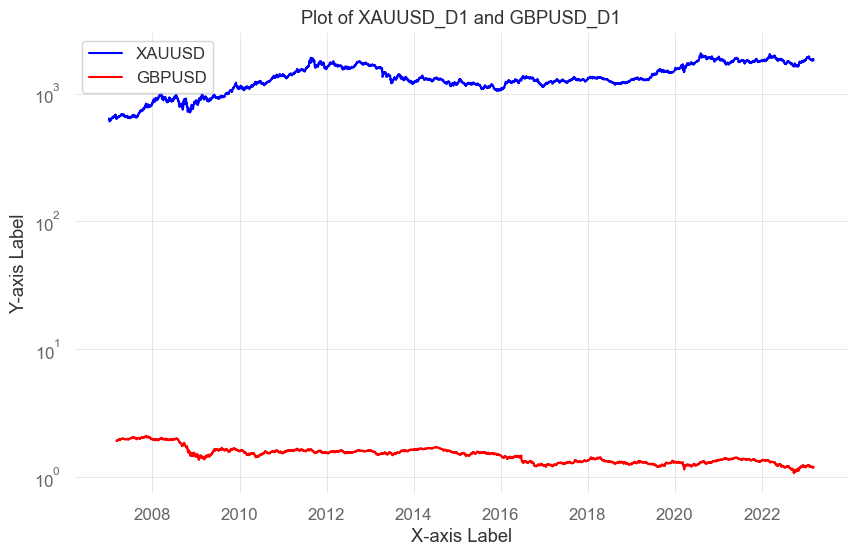

In [8]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [9]:
KF = Kalman_Filter(data_1, data_2)

In [10]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          3.944e+04
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:45:49   Log-Likelihood:                         -37905.
No. Observations:                5011   AIC:                                  7.581e+04
Df Residuals:                    5010   BIC:                                  7.582e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        866.7286      4.364    198.594      0.000     858.173     875.285
==============================================================================
Omnibus:                      211.399   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.537
Skew:                          -0.534   Prob(JB):                     1.59e-52
Kurtosis:                       3.024   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -76.68%
CAGR﹪                     -6.08%

Sharpe                     -0.39
Prob. Sharpe Ratio         3.88%
Smart Sharpe               -0.39
Sortino                    -0.53
Smart Sortino              -0.52
Sortino/√2                 -0.37
Smart Sortino/√2           -0.37
Omega                      0.93

Max Drawdown               -83.87%
Longest DD Days            5736
Volatility (ann.)          15.54%
Calmar                     -0.07
Skew                       -0.63
Kurtosis                   9.81

Expected Daily %           -0.03%
Expected Monthly %         -0.75%
Expected Yearly %          -8.21%
Kelly Criterion            -3.89%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.63%
Expected Shortfall (cVaR)  -1.63%

Max Consecuti

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-10,5736,-83.866060,-83.092998
2,2007-03-15,2007-04-16,2007-05-23,70,-4.350738,-3.980369
3,2007-05-25,2007-06-01,2007-06-07,14,-2.678756,-2.644806
4,2007-06-13,2007-06-19,2007-06-20,8,-1.349503,-1.179200
5,2007-03-07,2007-03-08,2007-03-12,6,-0.988445,-0.455483


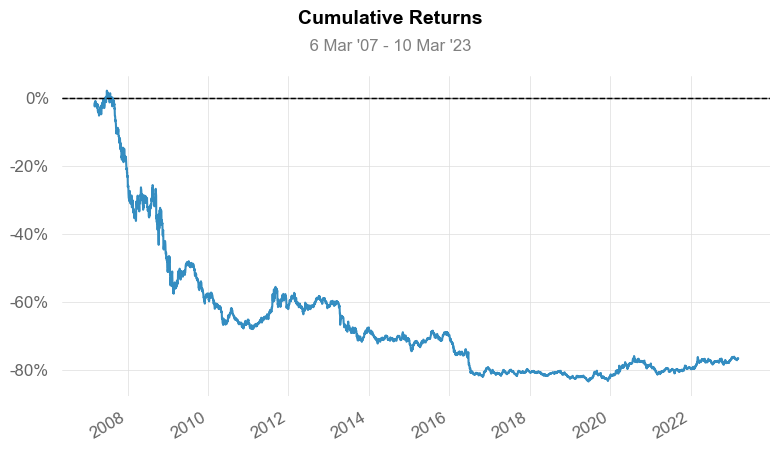

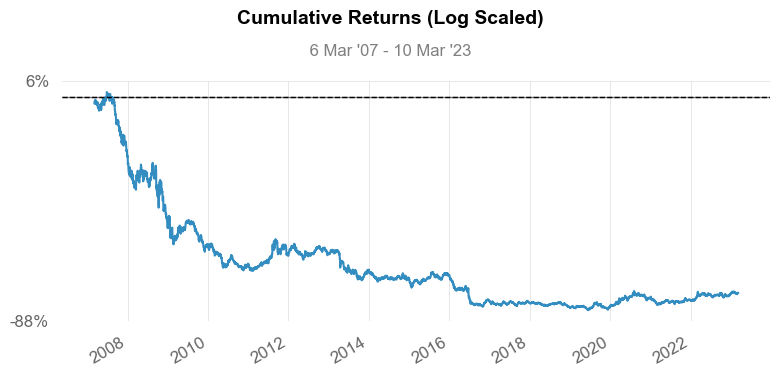

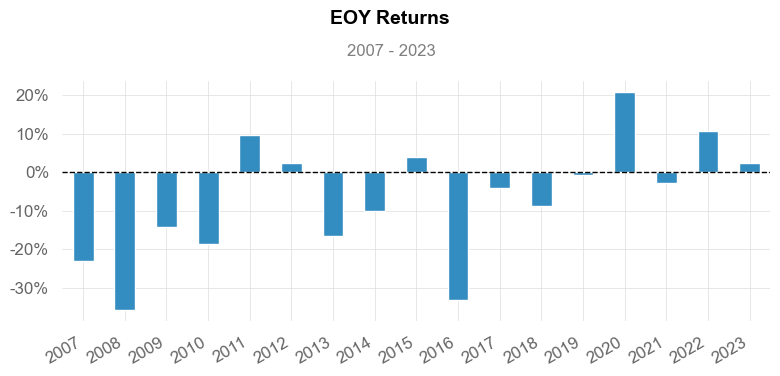

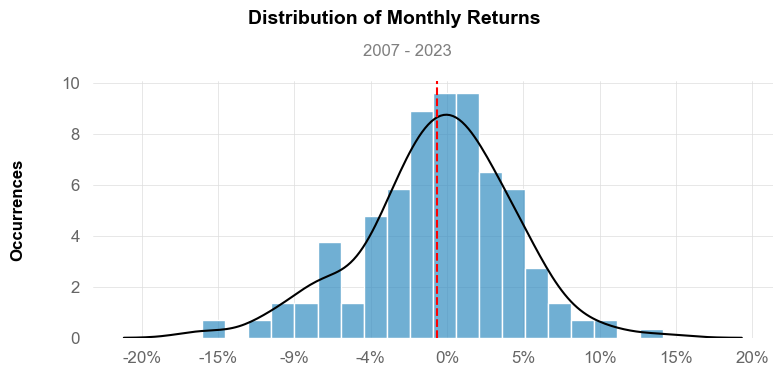

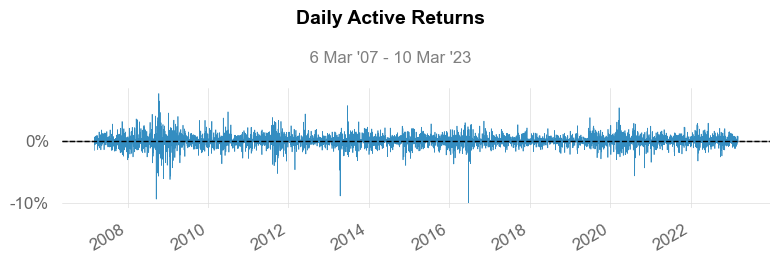

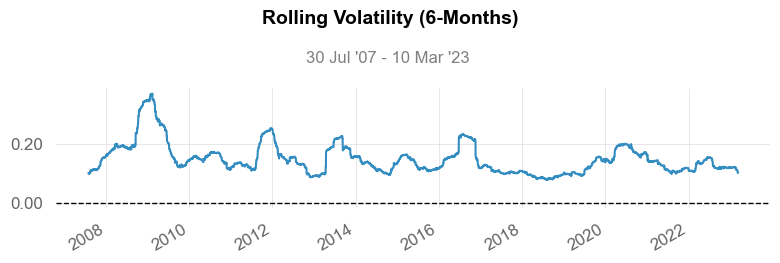

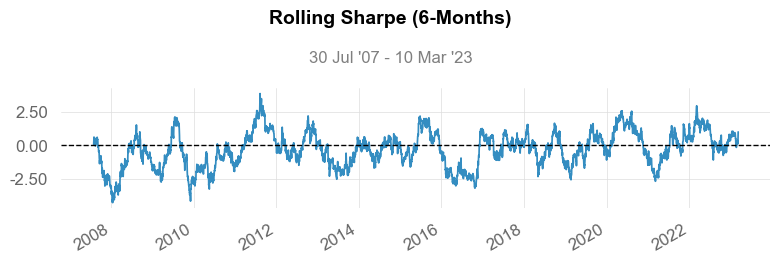

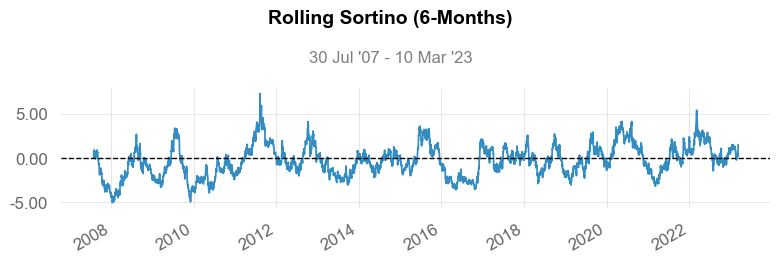

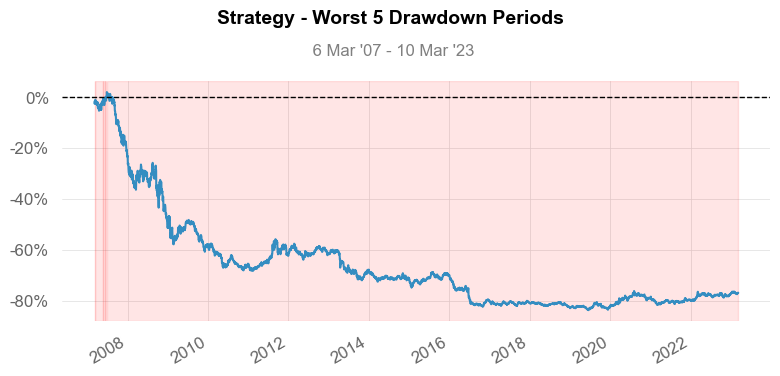

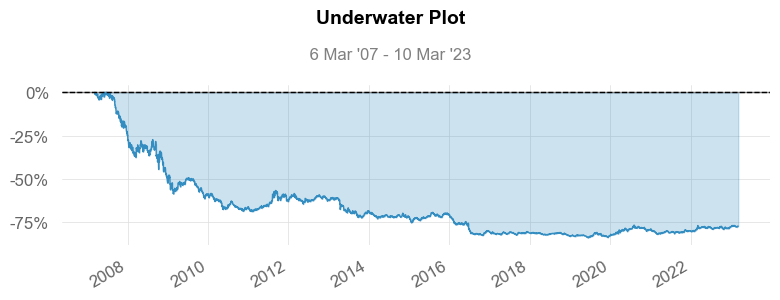

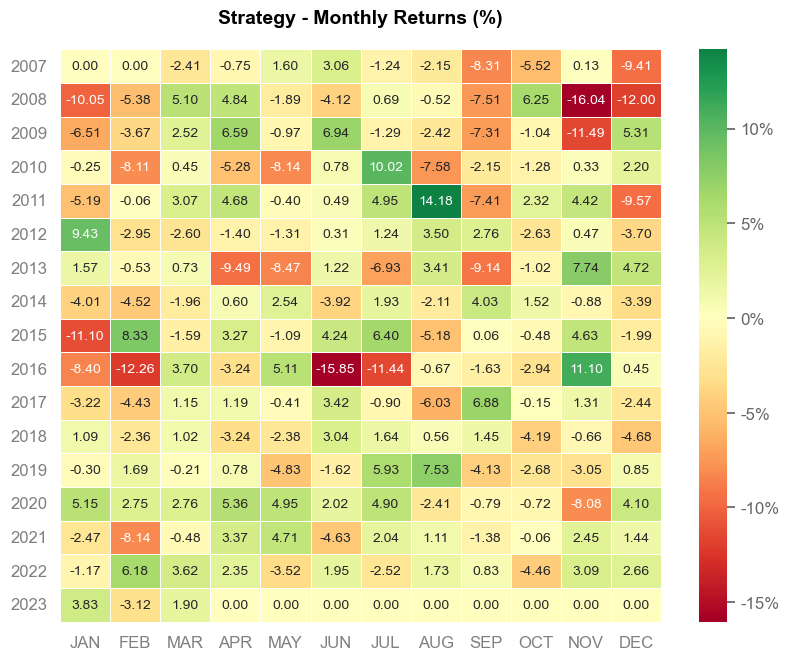

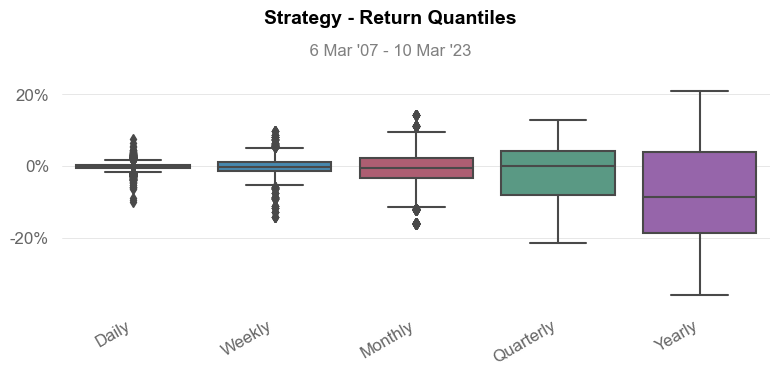

In [12]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H4

In [13]:
TF = 'H4'

In [14]:
data_1 = XAUUSD[TF]

In [15]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

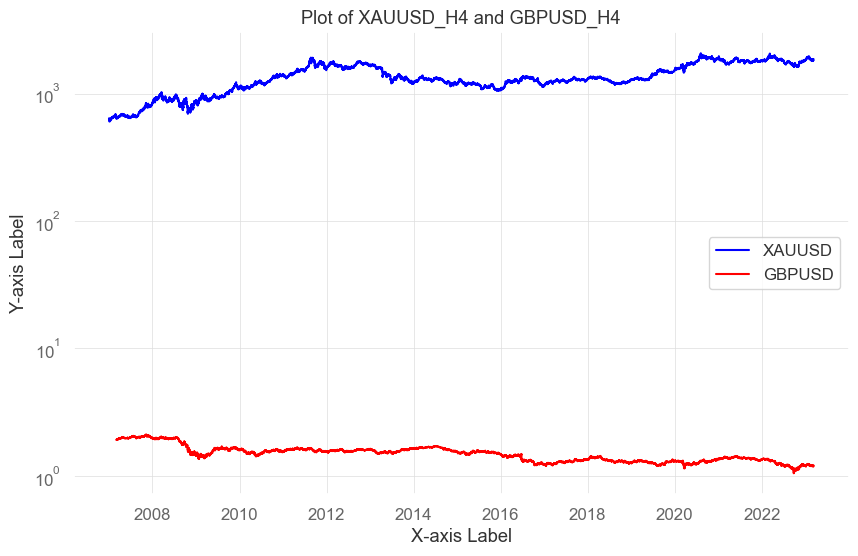

In [16]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [17]:
KF = Kalman_Filter(data_1, data_2)

In [18]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          2.031e+05
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:47:32   Log-Likelihood:                     -1.9552e+05
No. Observations:               25846   AIC:                                  3.910e+05
Df Residuals:                   25845   BIC:                                  3.911e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        866.4424      1.922    450.697      0.000     862.674     870.210
==============================================================================
Omnibus:                     1089.144   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1232.896
Skew:                          -0.535   Prob(JB):                    1.91e-268
Kurtosis:                       3.021   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -37.37%
CAGR﹪                     -2.0%

Sharpe                     -0.54
Prob. Sharpe Ratio         0.77%
Smart Sharpe               -0.52
Sortino                    -0.71
Smart Sortino              -0.69
Sortino/√2                 -0.5
Smart Sortino/√2           -0.49
Omega                      0.89

Max Drawdown               -51.47%
Longest DD Days            5842
Volatility (ann.)          4.22%
Calmar                     -0.04
Skew                       -0.99
Kurtosis                   17.76

Expected Daily %           -0.01%
Expected Monthly %         -0.24%
Expected Yearly %          -2.72%
Kelly Criterion            -5.72%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.45%
Expected Shortfall (cVaR)  -0.45%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-03-13,2019-01-04,2023-03-10,5842,-51.466815,-51.139596
2,2007-03-08,2007-03-09,2007-03-09,2,-0.211843,-0.091538


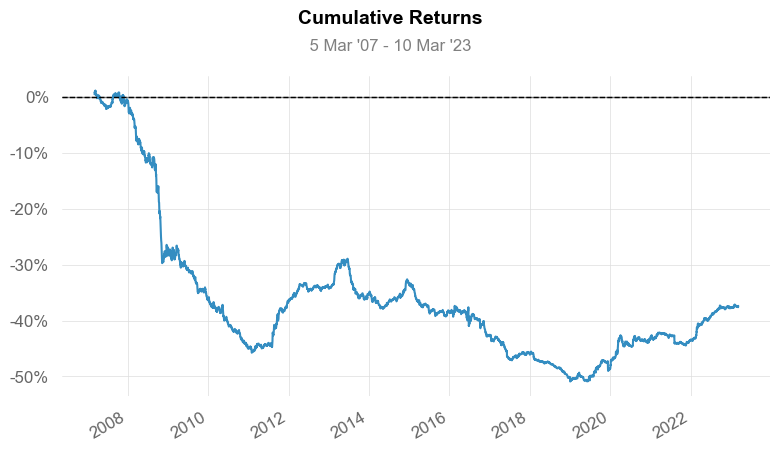

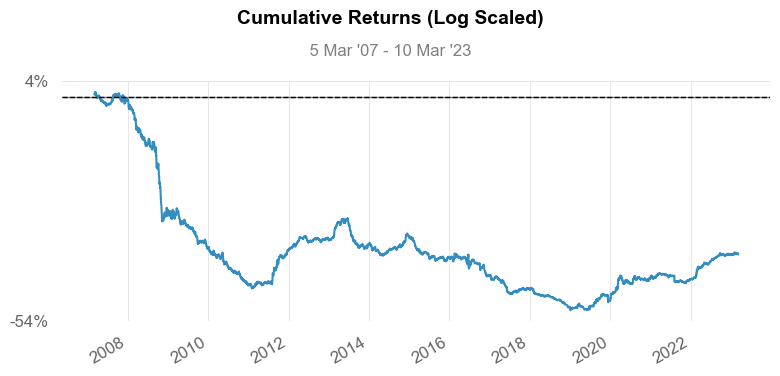

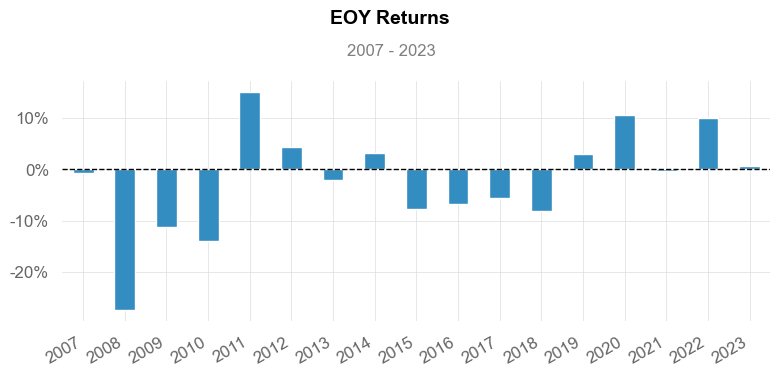

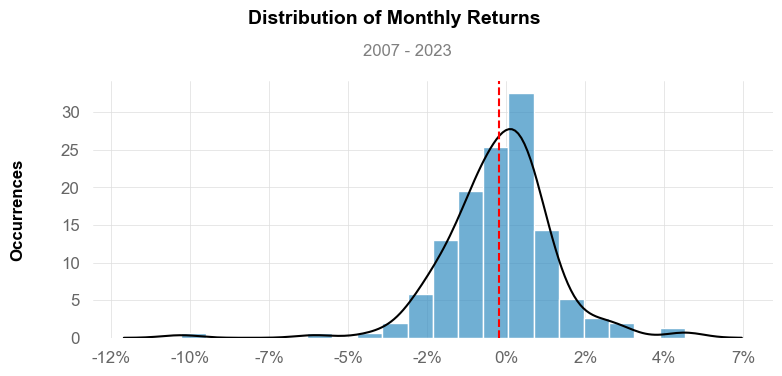

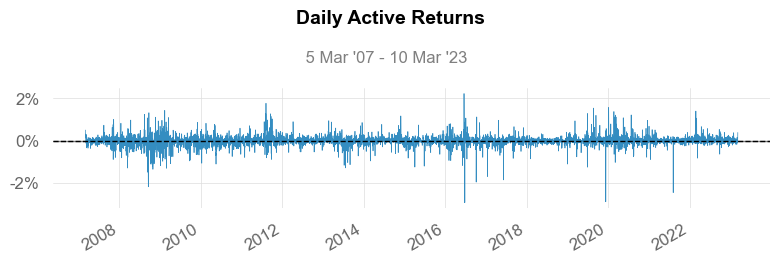

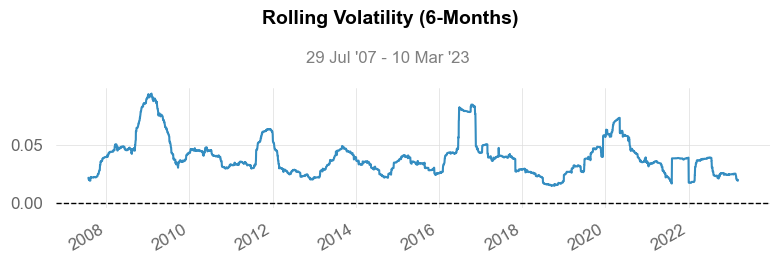

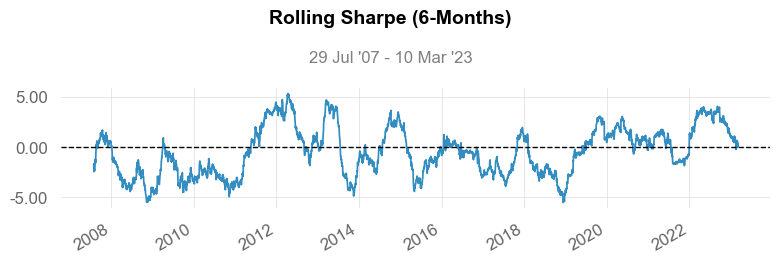

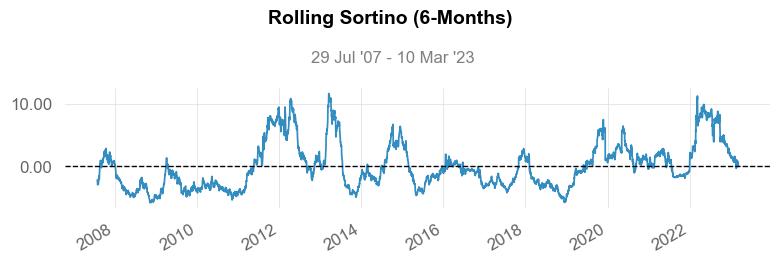

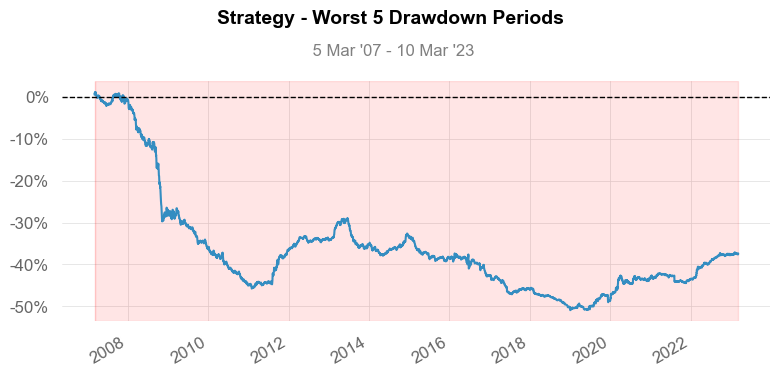

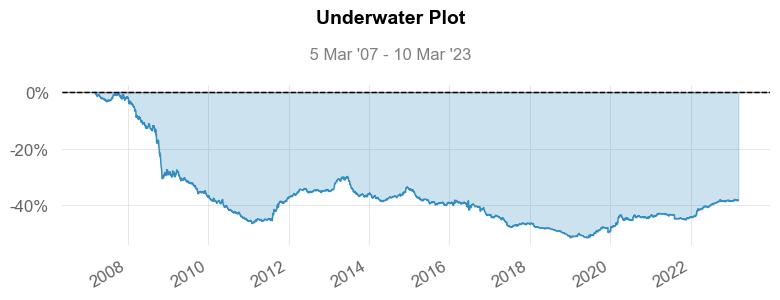

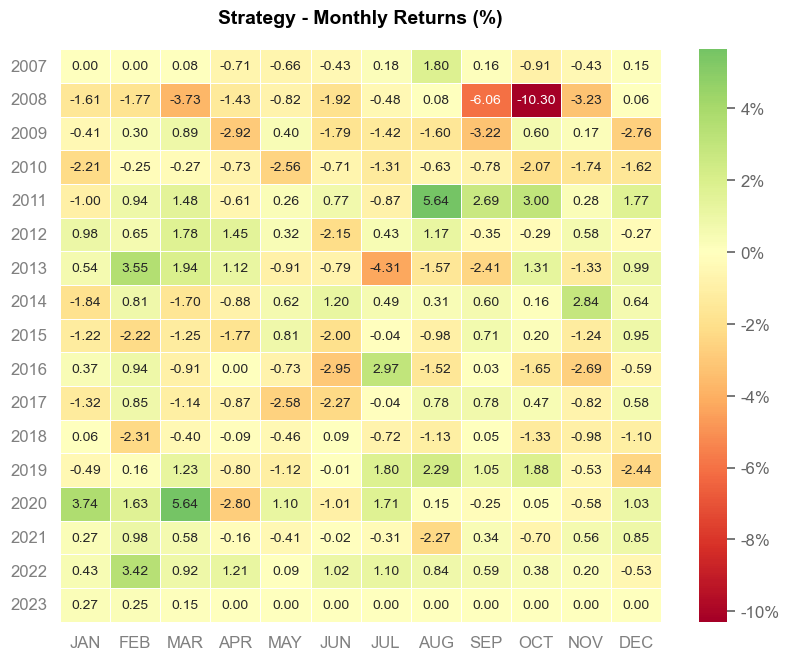

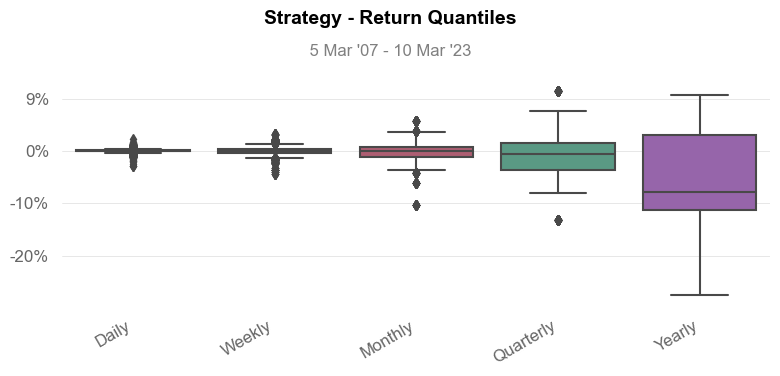

In [20]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H1

In [21]:
TF = 'H1'

In [22]:
data_1 = XAUUSD[TF]

In [23]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

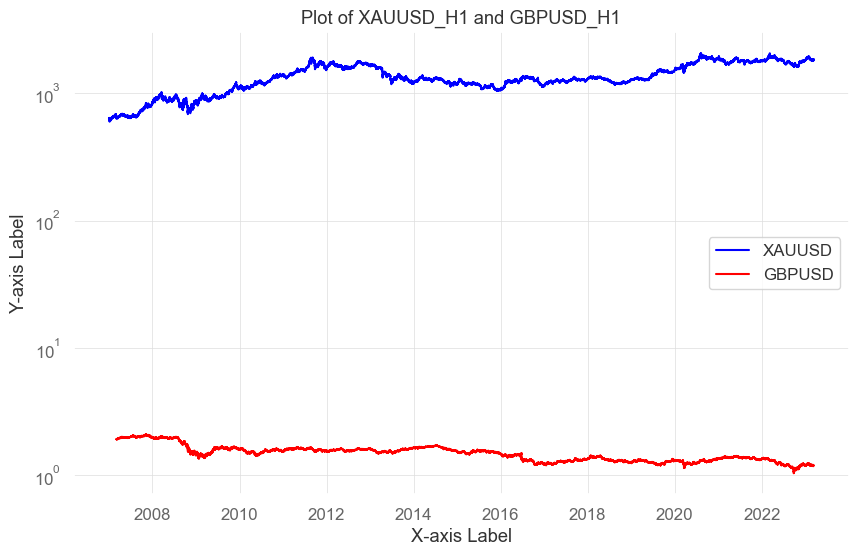

In [24]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [25]:
KF = Kalman_Filter(data_1, data_2)

In [26]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          7.858e+05
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:51:10   Log-Likelihood:                     -7.5654e+05
No. Observations:              100006   AIC:                                  1.513e+06
Df Residuals:                  100005   BIC:                                  1.513e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        866.3637      0.977    886.448      0.000     864.448     868.279
==============================================================================
Omnibus:                     4209.777   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4767.610
Skew:                          -0.535   Prob(JB):                         0.00
Kurtosis:                       3.020   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -4.5%
CAGR﹪                     -0.2%

Sharpe                     -0.07
Prob. Sharpe Ratio         38.55%
Smart Sharpe               -0.06
Sortino                    -0.09
Smart Sortino              -0.09
Sortino/√2                 -0.06
Smart Sortino/√2           -0.06
Omega                      0.99

Max Drawdown               -33.35%
Longest DD Days            5592
Volatility (ann.)          2.9%
Calmar                     -0.01
Skew                       -0.78
Kurtosis                   29.05

Expected Daily %           -0.0%
Expected Monthly %         -0.02%
Expected Yearly %          -0.27%
Kelly Criterion            -0.68%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.3%
Expected Shortfall (cVaR)  -0.3%

Max Consecutive Win

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-11-18,2019-06-03,2023-03-10,5592,-33.346566,-33.095087
2,2007-03-29,2007-07-06,2007-08-17,142,-1.784251,-1.619563
3,2007-09-20,2007-11-01,2007-11-09,51,-0.622986,-0.599643
4,2007-03-15,2007-03-26,2007-03-26,12,-0.407633,-0.302373
5,2007-09-07,2007-09-12,2007-09-13,7,-0.262887,-0.223825


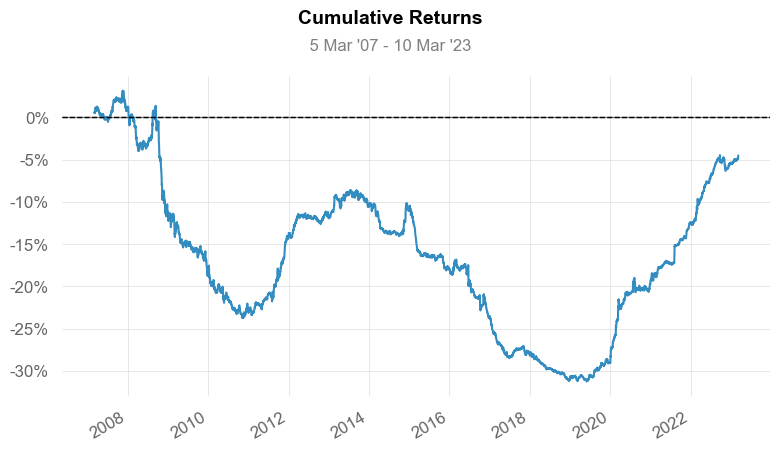

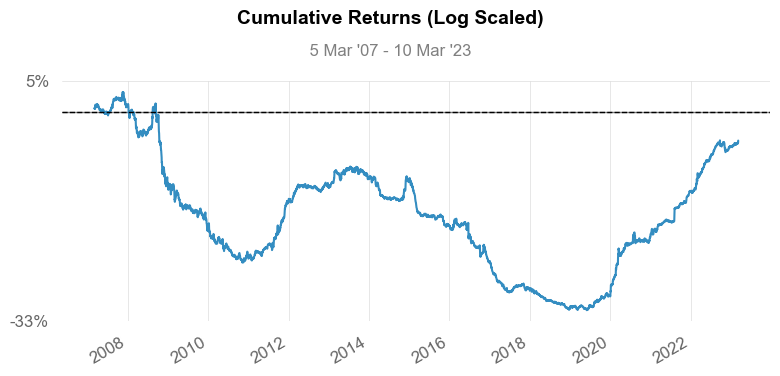

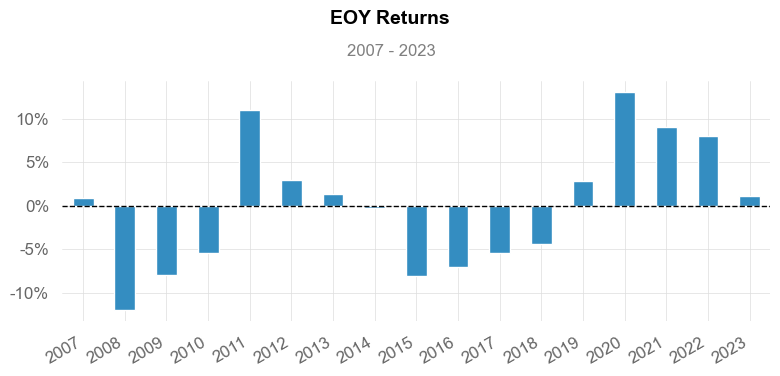

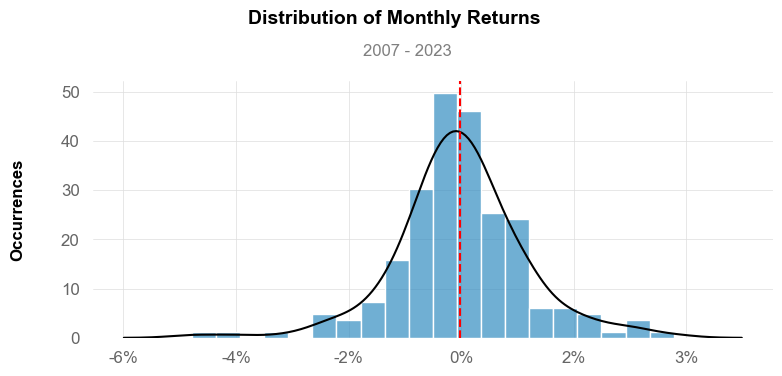

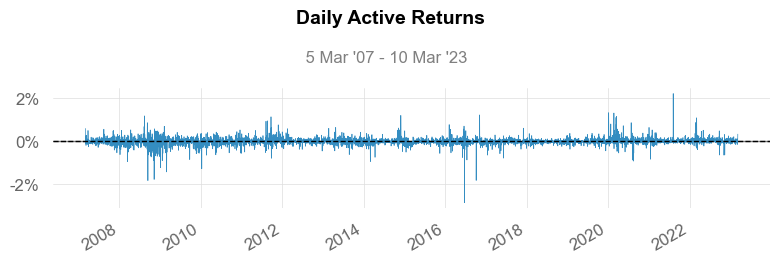

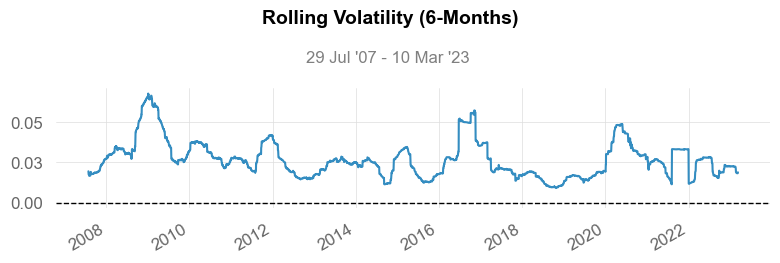

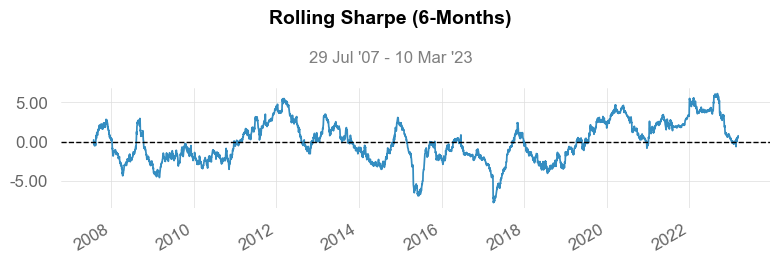

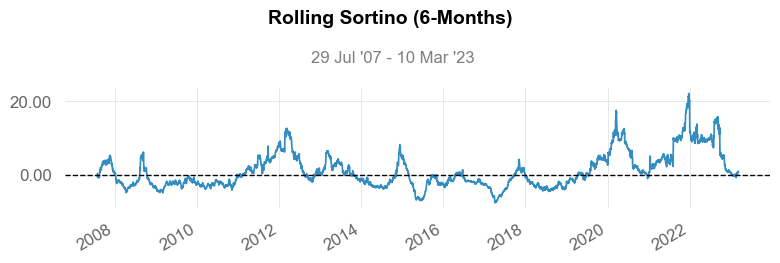

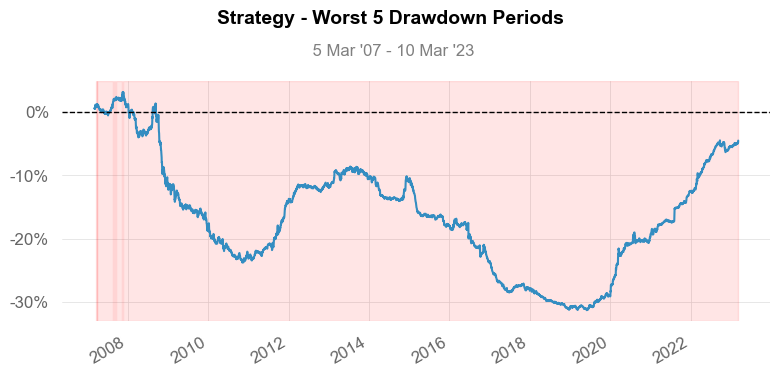

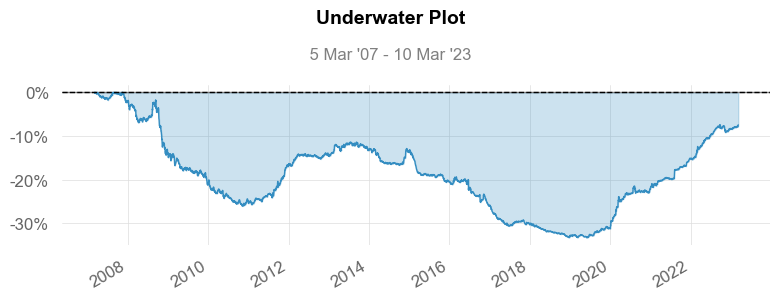

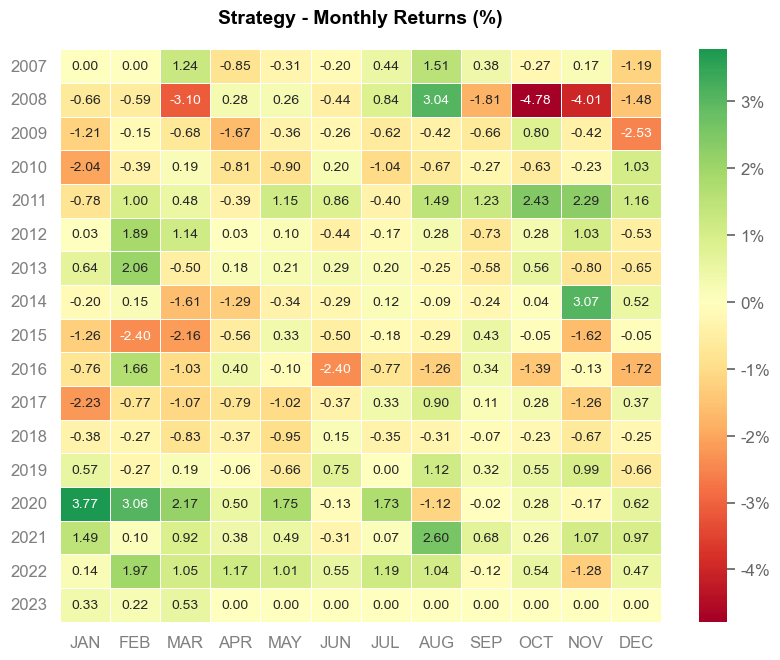

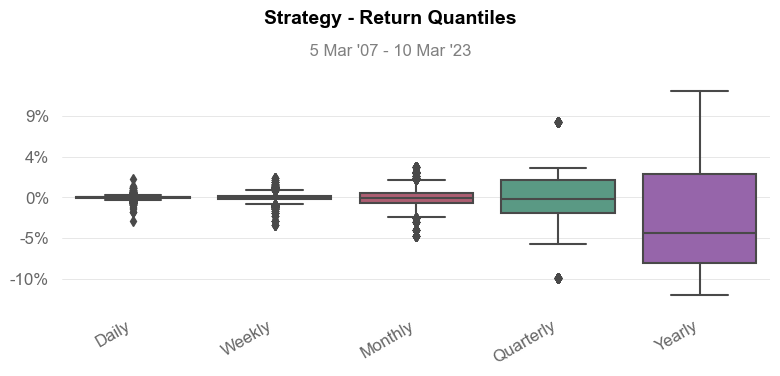

In [28]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H30

In [31]:
TF = 'M30'

In [32]:
data_1 = XAUUSD[TF]

In [33]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

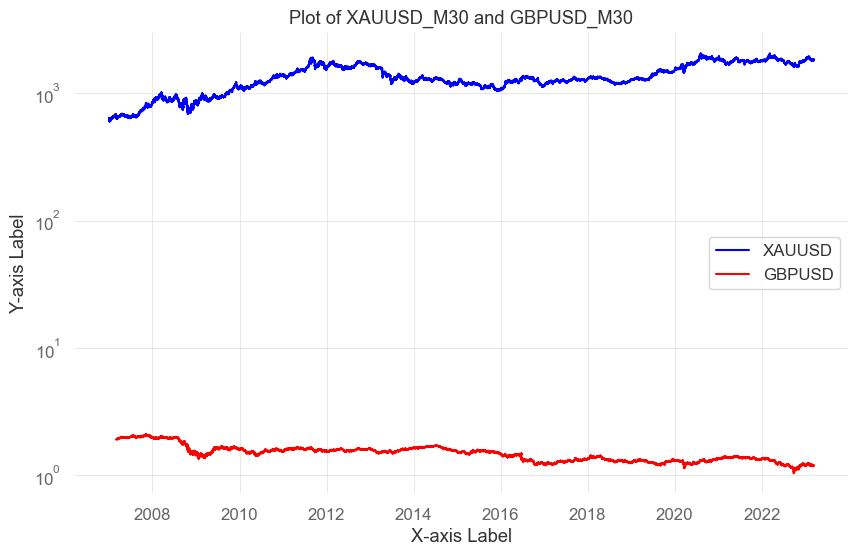

In [34]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [35]:
KF = Kalman_Filter(data_1, data_2)

In [36]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          1.571e+06
Date:                Mon, 12 Feb 2024   Prob (F-statistic):                        0.00
Time:                        00:12:40   Log-Likelihood:                     -1.5130e+06
No. Observations:              200000   AIC:                                  3.026e+06
Df Residuals:                  199999   BIC:                                  3.026e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close        866.3595      0.691   1253.581      0.000     865.005     867.714
==============================================================================
Omnibus:                     8418.500   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9534.931
Skew:                          -0.535   Prob(JB):                         0.00
Kurtosis:                       3.020   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          3.29%
CAGR﹪                     0.14%

Sharpe                     0.1
Prob. Sharpe Ratio         66.8%
Smart Sharpe               0.1
Sortino                    0.14
Smart Sortino              0.14
Sortino/√2                 0.1
Smart Sortino/√2           0.1
Omega                      1.02

Max Drawdown               -12.5%
Longest DD Days            5294
Volatility (ann.)          1.84%
Calmar                     0.01
Skew                       0.01
Kurtosis                   10.03

Expected Daily %           0.0%
Expected Monthly %         0.02%
Expected Yearly %          0.19%
Kelly Criterion            0.93%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.19%
Expected Shortfall (cVaR)  -0.19%

Max Consecutive Wins       11
Max 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-09-11,2011-08-04,2023-03-10,5294,-12.503242,-12.088482
2,2007-12-28,2008-04-11,2008-09-09,257,-3.301831,-3.206678
3,2007-03-15,2007-04-23,2007-06-22,100,-1.077822,-1.009275
4,2007-08-27,2007-09-25,2007-10-29,64,-0.712885,-0.682797
5,2007-11-26,2007-12-11,2007-12-26,31,-0.668980,-0.591465


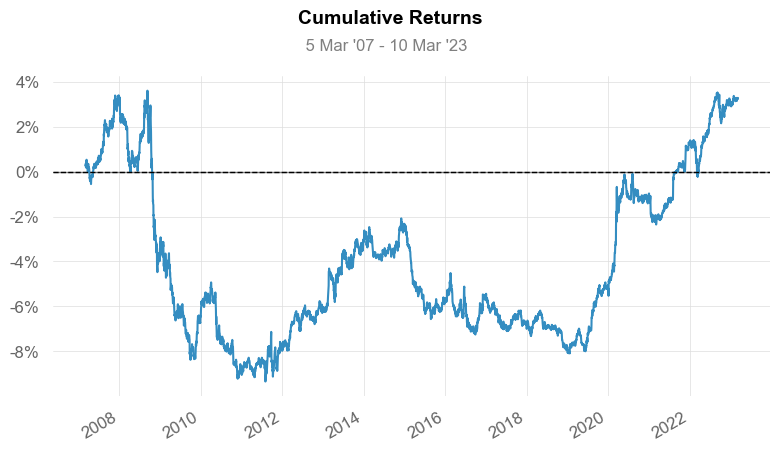

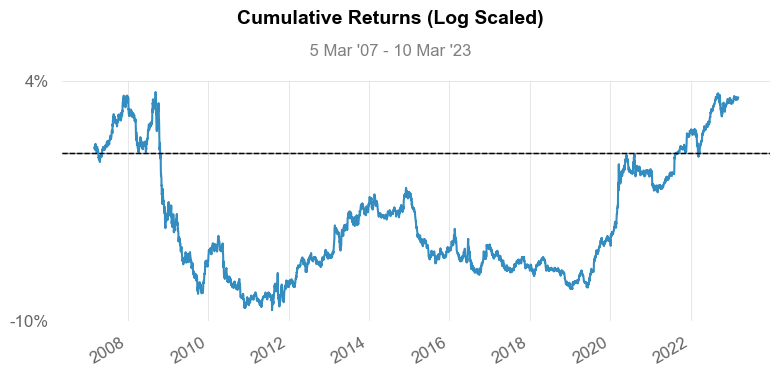

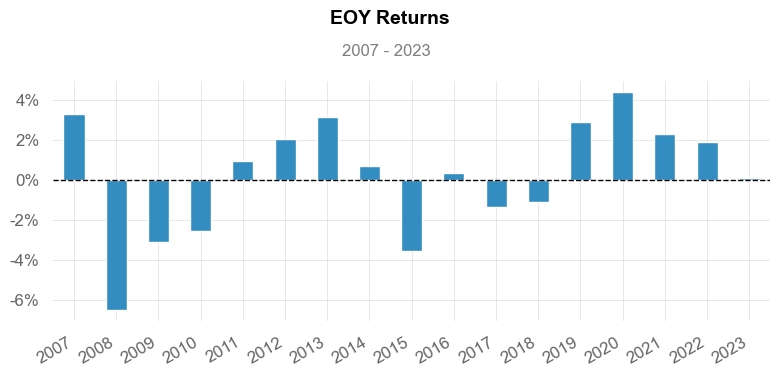

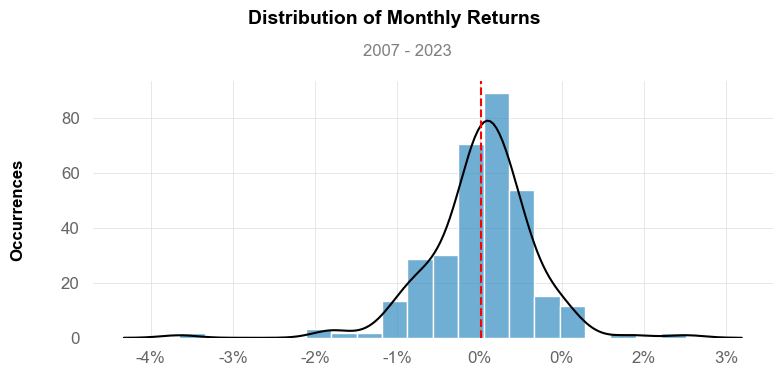

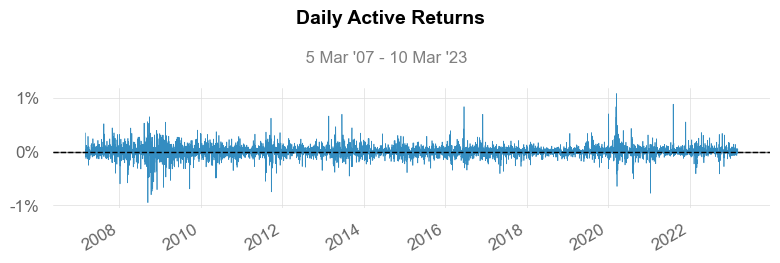

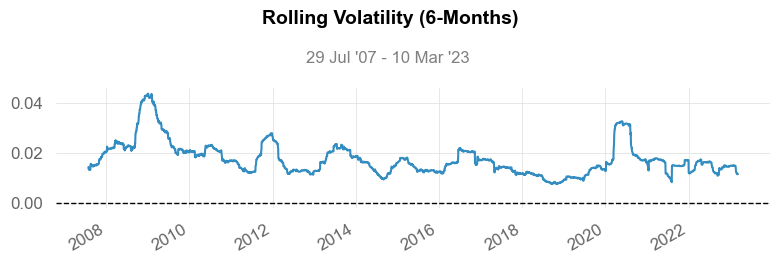

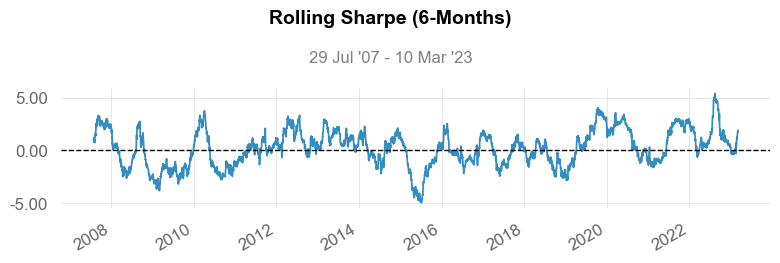

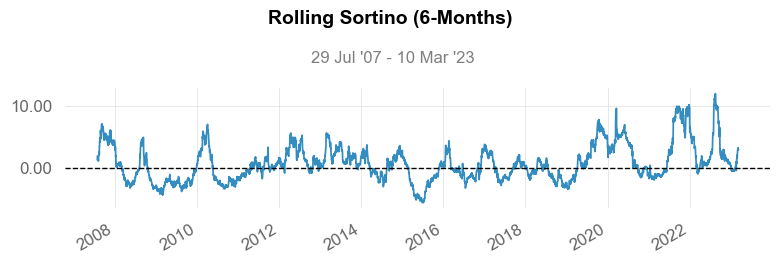

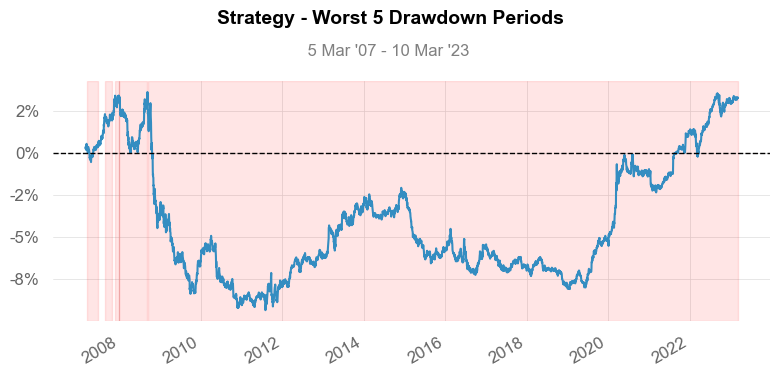

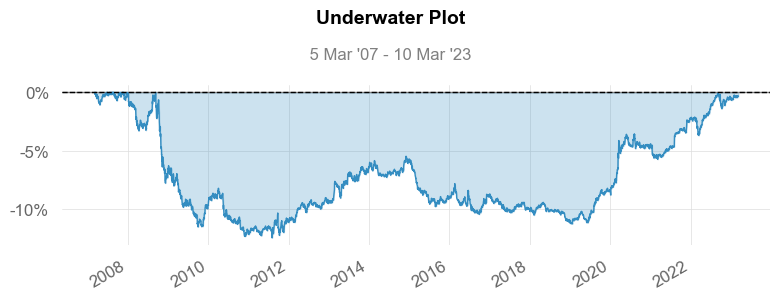

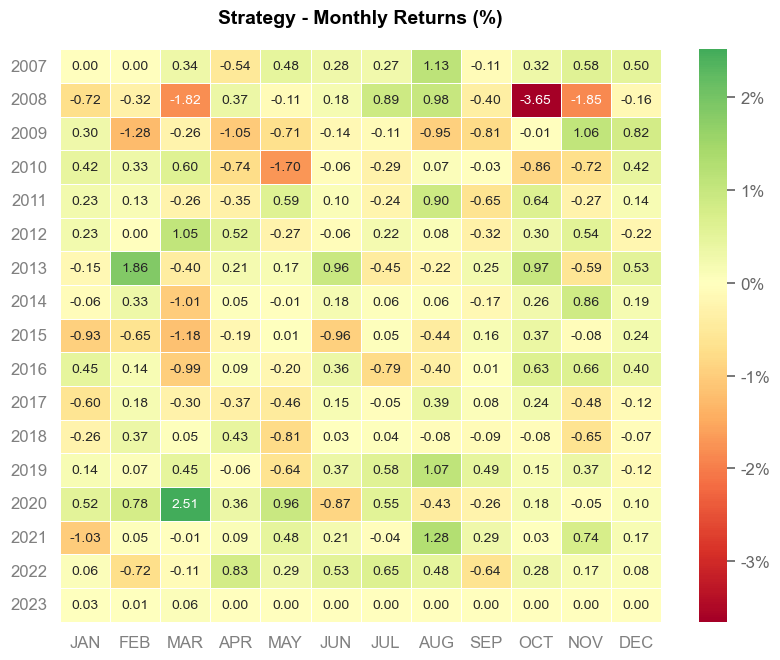

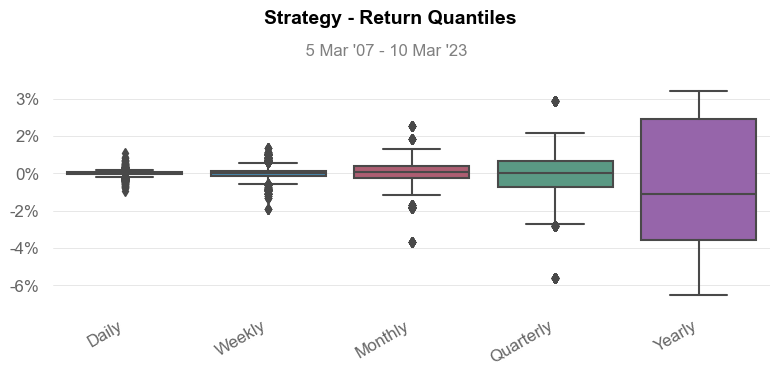

In [38]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())